### Import Libraries

In [ ]:
import imp
import utils
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T
from torch.autograd import Variable
from PIL import Image

import PIENet.Eval
import USI3D.eval


torch.manual_seed(17)

### Using Unsupervised Learning for Intrinsic Image Decomposition from a Single Image (USI)

In [71]:
data_USI3D = eval.main(config='USI3D/configs/intrinsic_MIX_IIW.yaml', input_dir = './USI3D/test', output_folder = './USI3D/results/', checkpoint = './USI3D/pretrained_model/gen-MIX.pt')

Processing: 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]


### Using Photometric Invariant Edge Guided Network for Intrinsic Image Decomposition (PIENet)

In [74]:
data_PIENet = PIENet.Eval.image_decomposition(PIENet.Eval.net)

Found 8 files at query location


100%|██████████| 8/8 [00:05<00:00,  1.58it/s]


### Sample PIENet Results

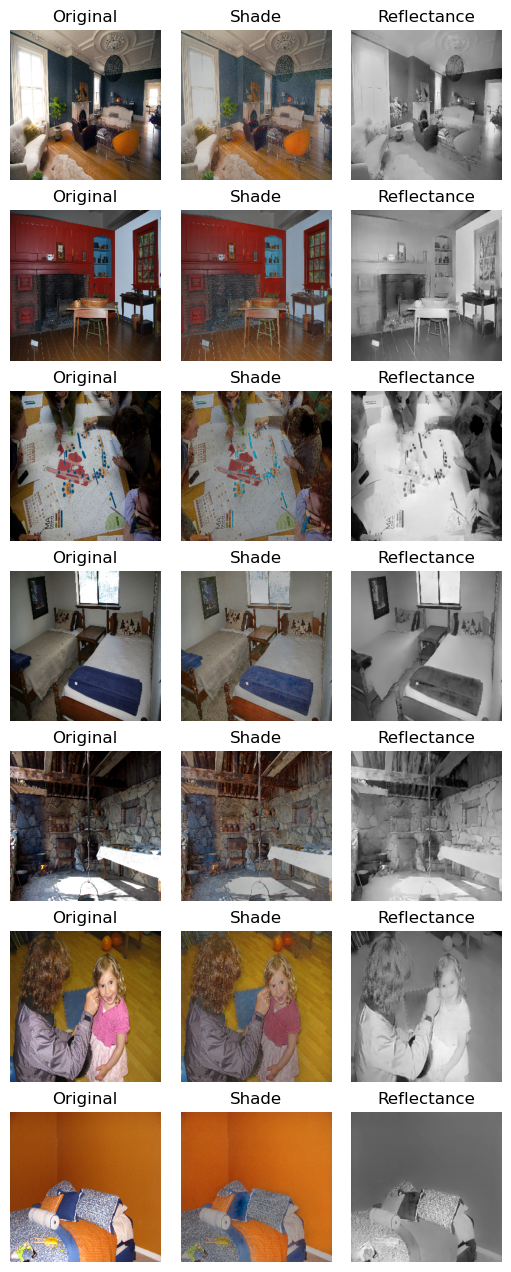

In [180]:
index = [0,2,3,4,5,6,7]
fig, ax = plt.subplots(len(index), 3, figsize=(16,16))
plt.subplots_adjust(wspace=-0.81, hspace=0.2)
for i in range(len(index)):
    for j in range(3):
        if j==0:
            img = img = data_PIENet[index[i]]['img'].clone().detach()
            ax[i,j].imshow(img.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Original')
        elif j==2:
            img = data_PIENet[index[i]]['pred_shd'].clone().detach()
            ax[i,j].imshow(img.permute(1, 2, 0).cpu(),cmap='gray')
            ax[i,j].set_title('Reflectance')
        else:
            img = data_PIENet[index[i]]['pred_alb'].clone().detach()
            ax[i,j].imshow(img.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Shade')
        ax[i,j].axis('off')


### Sample USI Results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


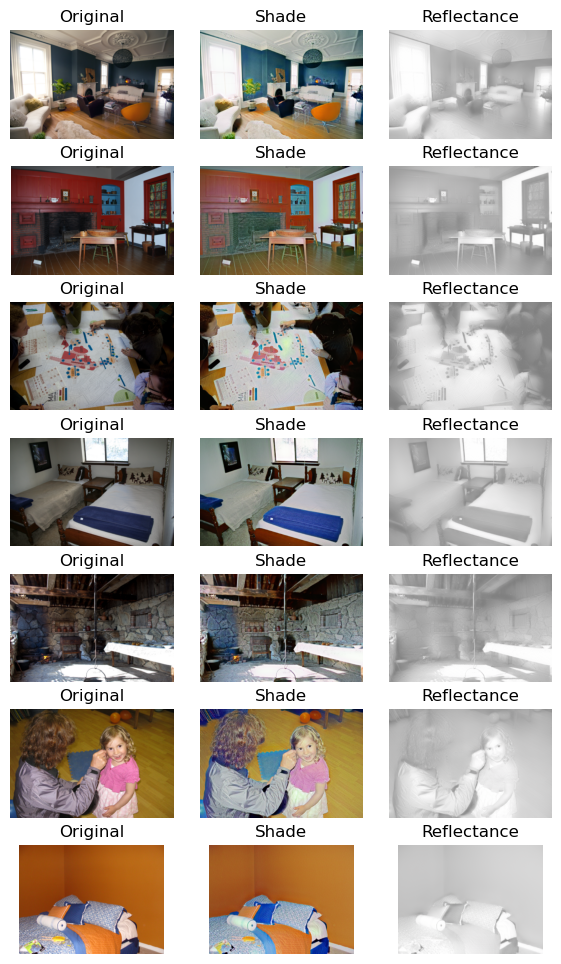

In [187]:
index = [0,1,2,3,4,5,6]
fig, ax = plt.subplots(len(index), 3, figsize=(16,12))
plt.subplots_adjust(wspace=-0.78, hspace=0.25)
# fig.tight_layout()
for i in range(len(index)):
    for j in range(3):

        if j==0:
            img = img = data_USI3D[index[i]]['img'].clone().detach()
            ax[i,j].imshow(img.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Original')
        elif j==2:
            img = data_USI3D[index[i]]['pred_shd'].clone().detach()
            ax[i,j].imshow(img.permute(1, 2, 0).cpu(),cmap='gray')
            ax[i,j].set_title('Reflectance')
        else:
            img = data_USI3D[index[i]]['pred_alb'].clone().detach()
            ax[i,j].imshow(img.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Shade')
        ax[i,j].axis('off')


### Effect of Hue 
Compare the effect of applying hue on original image vs albedo of image

#### PIENet

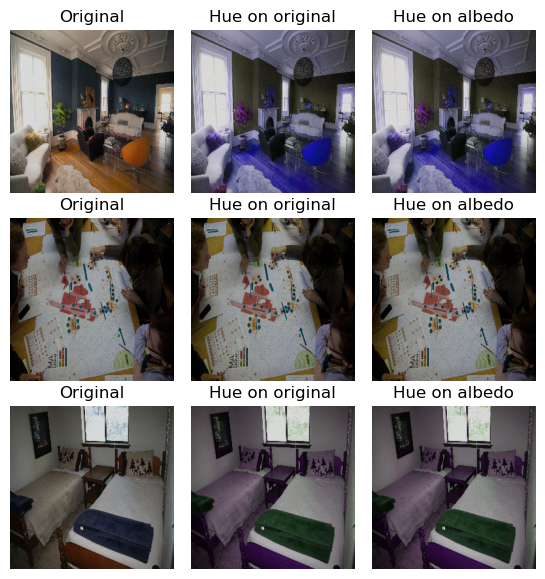

In [202]:
index = [0,3,4]
fig, ax = plt.subplots(len(index), 3, figsize=(7,7))
plt.subplots_adjust(wspace=-0.0, hspace=0.15)
for i in range(len(index)):
    hue=np.random.uniform(-0.5,0.5)
    for j in range(3):
        alb = data_PIENet[index[i]]['pred_alb'].clone().detach()
        shd = data_PIENet[index[i]]['pred_shd'].clone().detach()

        if j==0:
            transformed_image  = alb * shd
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Original')
        elif j==1:
            transformed_image  = alb * shd
            transformed_image = T.functional.adjust_hue(transformed_image,hue_factor=hue)
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Hue on original')
        else:
            alb = T.functional.adjust_hue(alb,hue_factor=hue)
            transformed_image  = alb * shd
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Hue on albedo')
        ax[i,j].axis('off')

#### USI

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


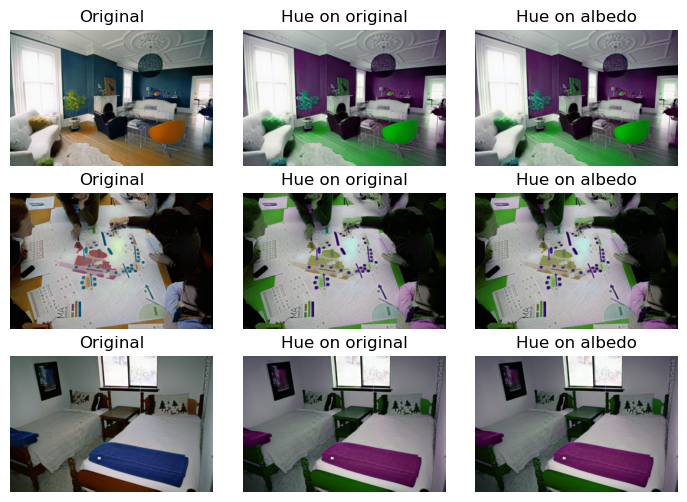

In [212]:
index = [0,2,3]
fig, ax = plt.subplots(len(index), 3, figsize=(9,6))
plt.subplots_adjust(wspace=-0.0, hspace=0.2)
for i in range(len(index)):
    hue=np.random.uniform(-0.5,0.5)
    for j in range(3):
        alb = data_USI3D[index[i]]['pred_alb'].clone().detach()
        shd = data_USI3D[index[i]]['pred_shd'].clone().detach()

        if j==0:
            transformed_image  = alb * shd
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Original')
        elif j==1:
            transformed_image  = alb * shd
            transformed_image = T.functional.adjust_hue(transformed_image,hue_factor=hue)
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Hue on original')
        else:
            alb = T.functional.adjust_hue(alb,hue_factor=hue)
            transformed_image  = alb * shd
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Hue on albedo')
        ax[i,j].axis('off')

### Effect of Gamma Correction 
Compare the effect of gamma correction on original image vs shading 

#### PIENet

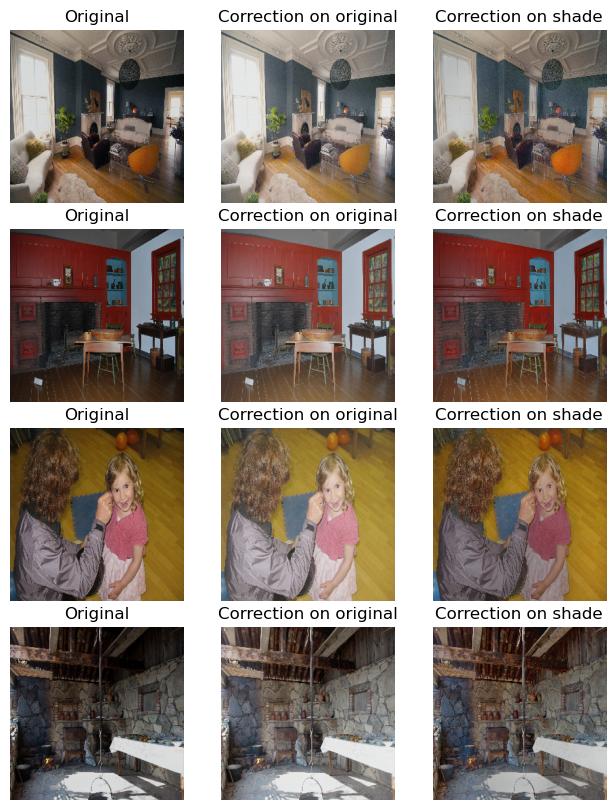

In [111]:
index = [0,2,6,5]
fig, ax = plt.subplots(len(index), 3, figsize=(10,10))
plt.subplots_adjust(wspace=-0.4, hspace=0.15)
for i in range(len(index)):
    hue=np.random.uniform(-0.5,0.5)
    for j in range(3):

        alb = data_PIENet[index[i]]['pred_alb'].clone().detach()
        shd = data_PIENet[index[i]]['pred_shd'].clone().detach()

        if j==0:
            transformed_image  = alb * shd
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Original')
        elif j==1:
            transformed_image  =alb * shd
            transformed_image = T.functional.adjust_gamma(transformed_image, gamma=0.6)
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Correction on original')
        else:
            tranformed_shd = T.functional.adjust_gamma(shd, gamma=0.07)
            transformed_image  = alb * tranformed_shd
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Correction on shade')
        ax[i,j].axis('off')
        

#### USI

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


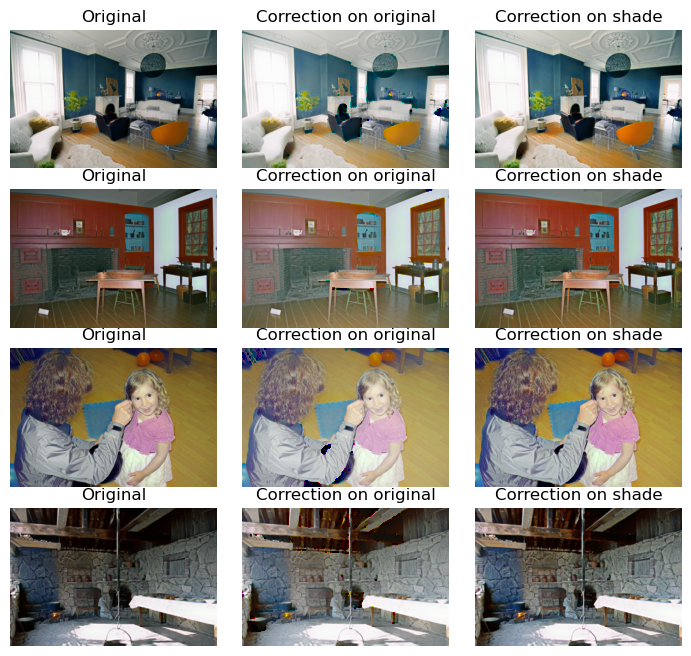

In [214]:
index = [0,1,5,4]
fig, ax = plt.subplots(len(index), 3, figsize=(11,8))
plt.subplots_adjust(wspace=-0.4, hspace=0.15)
for i in range(len(index)):
    hue=np.random.uniform(-0.5,0.5)
    for j in range(3):

        alb = data_USI3D[index[i]]['pred_alb'].clone().detach()
        shd = data_USI3D[index[i]]['pred_shd'].clone().detach()

        if j==0:
            transformed_image  = alb * shd
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Original')
        elif j==1:
            transformed_image  =alb * shd
            transformed_image = T.functional.adjust_gamma(transformed_image, gamma=0.6)
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Correction on original')
        else:
            tranformed_shd = T.functional.adjust_gamma(shd, gamma=0.07)
            transformed_image  = alb * tranformed_shd
            ax[i,j].imshow(transformed_image.permute(1, 2, 0).cpu())
            ax[i,j].set_title('Correction on shade')
        ax[i,j].axis('off')
        

### Experimenting with Reflectance
In this, the reflectance of the image is edited to remove some drawing on the paper and then combined with shading to see the result

#### PIENet

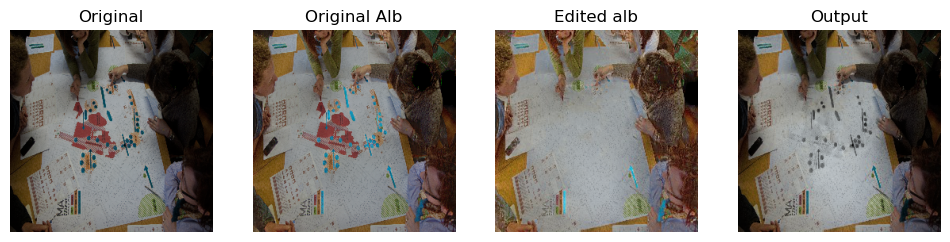

In [156]:
fig, ax = plt.subplots(1, 4, figsize=(12,12))
np.vectorize(lambda ax:ax.axis('off'))(ax)
# plt.subplots_adjust(wspace=-0.4, hspace=0.15)
index=3
alb = data_PIENet[index]['pred_alb'].clone().detach()
shd = data_PIENet[index]['pred_shd'].clone().detach()
image  = alb * shd
ax[0].imshow(image.permute(1, 2, 0).cpu())
ax[0].set_title('Original')

ax[1].imshow(alb.permute(1, 2, 0).cpu())
ax[1].set_title('Original Alb')

transformed_alb = data_PIENet[1]['pred_alb'].clone().detach()
ax[2].imshow(transformed_alb.permute(1, 2, 0).cpu())
ax[2].set_title('Edited alb')
        
    
alb = transformed_alb.clone().detach()
shd = data_PIENet[index]['pred_shd'].clone().detach()
transformed_image  = alb * shd
ax[3].imshow(transformed_image.permute(1, 2, 0).cpu())
ax[3].set_title('Output');
# ax.set_axis('off')
        

#### USI

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


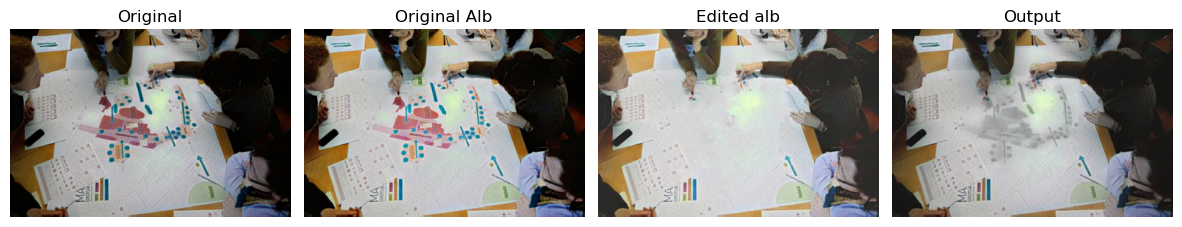

In [220]:
fig, ax = plt.subplots(1, 4, figsize=(15,12))
np.vectorize(lambda ax:ax.axis('off'))(ax)
plt.subplots_adjust(wspace=0.05, hspace=0.15)
index=2
alb = data_USI3D[index]['pred_alb'].clone().detach()
shd = data_USI3D[index]['pred_shd'].clone().detach()
image  = alb * shd
ax[0].imshow(image.permute(1, 2, 0).cpu())
ax[0].set_title('Original')

ax[1].imshow(alb.permute(1, 2, 0).cpu())
ax[1].set_title('Original Alb')


transform = T.Compose([T.Resize(USI3D.eval.new_size),
                                        T.ToTensor(),])
transformed_alb = Variable(transform(Image.open('USI3D/results/toyfoo_5509577220/output_r_edited.jpg').convert('RGB')).cuda())
transformed_alb = transformed_alb.clone().detach()
ax[2].imshow(transformed_alb.permute(1, 2, 0).cpu())
ax[2].set_title('Edited alb')

transformed_image  = transformed_alb * shd
ax[3].imshow(transformed_image.permute(1, 2, 0).cpu())
ax[3].set_title('Output');
# ax.set_axis('off')
        